In [10]:
#1. Correlation coefficient of the Pair of features.
#Importing Utilities
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/ameerfaizal/Documents/Influencer.csv') # Loading the dataset
df
df['Channel Info']=df['Channel Info'].str.replace('\n','')
df["Followers"]=df["Followers"].replace({"m":"*1e6"}, regex=True).map(pd.eval)
df["Avg. Likes"]=df["Avg. Likes"].replace({"k":"*1e3","m":"*1e6"}, regex=True).map(pd.eval)
df["Posts"]=df["Posts"].replace({"k":"*1e3"}, regex=True).map(pd.eval)
df["New Post Avg. Likes"]=df["New Post Avg. Likes"].replace({"k":"*1e3","m":"*1e6"}, regex=True).map(pd.eval)
df["Total Likes"]=df["Total Likes"].replace({"b":"*1e9","m":"*1e6"}, regex=True).map(pd.eval)
df
df.isnull().sum()
df['Country Or Region'].fillna(df['Country Or Region'].mode()[0], inplace=True)
df['Country Or Region']
df.isnull().sum()
df.corr().unstack().sort_values().drop_duplicates()








Followers            Rank                  -0.698193
Total Likes          Rank                  -0.465119
Influence Score      Rank                  -0.354843
Posts                Avg. Likes            -0.348795
                     60-Day Eng Rate       -0.334047
New Post Avg. Likes  Posts                 -0.285154
Rank                 Avg. Likes            -0.277699
                     New Post Avg. Likes   -0.272323
60-Day Eng Rate      Followers             -0.107439
                     Influence Score       -0.072460
Rank                 Posts                 -0.058132
Total Likes          60-Day Eng Rate       -0.001560
Rank                 60-Day Eng Rate        0.028900
Influence Score      New Post Avg. Likes    0.040011
Avg. Likes           Influence Score        0.048502
Followers            Posts                  0.069171
Posts                Influence Score        0.168287
                     Total Likes            0.232038
Total Likes          Influence Score        0.

(array([  1.,   0.,   3.,   1.,   1.,   2.,   3.,  25., 107.,  57.]),
 array([22. , 29.1, 36.2, 43.3, 50.4, 57.5, 64.6, 71.7, 78.8, 85.9, 93. ]),
 <BarContainer object of 10 artists>)

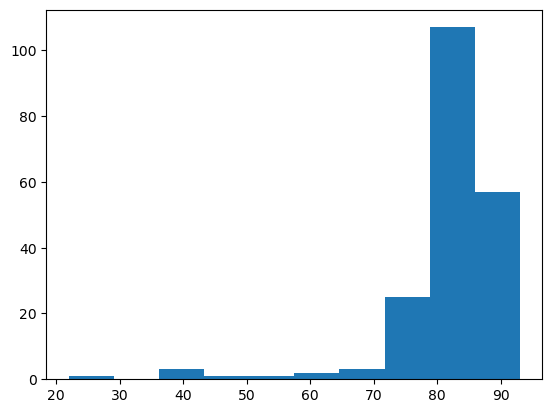

In [11]:
#2. Frequency distyribution of the following features
# 2.1 Influence score
import matplotlib.pyplot as plt
plt.hist(df['Influence Score'])



(array([161.,  10.,   8.,   5.,   6.,   3.,   4.,   2.,   0.,   1.]),
 array([3.3400e+07, 7.8580e+07, 1.2376e+08, 1.6894e+08, 2.1412e+08,
        2.5930e+08, 3.0448e+08, 3.4966e+08, 3.9484e+08, 4.4002e+08,
        4.8520e+08]),
 <BarContainer object of 10 artists>)

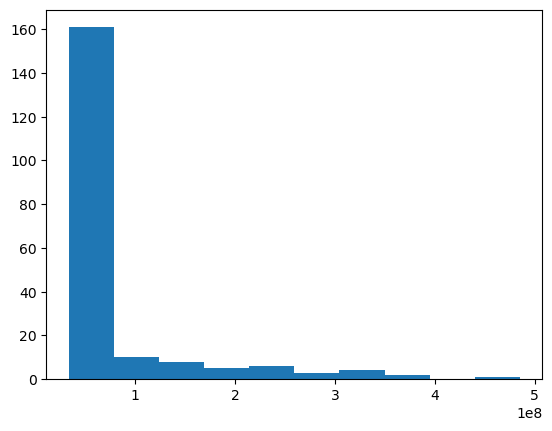

In [12]:
#2.2 Frequency distribution of followers
plt.hist(df['Followers'])

(array([84., 44., 22., 13., 11., 22.,  2.,  1.,  0.,  1.]),
 array([   20.,  1708.,  3396.,  5084.,  6772.,  8460., 10148., 11836.,
        13524., 15212., 16900.]),
 <BarContainer object of 10 artists>)

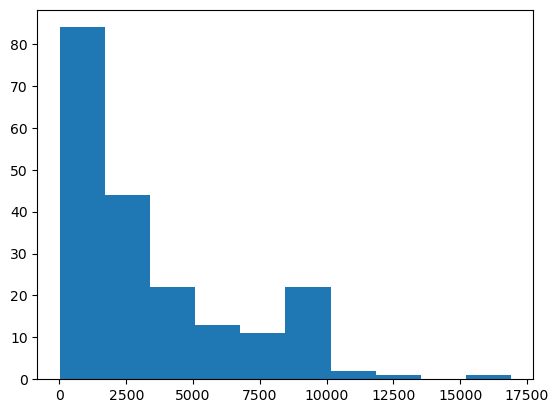

In [13]:
#2.3 Frequency distribution of Posts
plt.hist(df['Posts'])

In [14]:
# 3. Country housing the no of Instagram Influencers
df['Country Or Region'].value_counts()


United States             128
Brazil                     13
India                      12
Indonesia                   7
France                      6
Spain                       5
United Kingdom              4
Colombia                    3
Canada                      3
Mexico                      2
Turkey                      2
Netherlands                 2
Switzerland                 1
Germany                     1
Czech Republic              1
British Virgin Islands      1
Sweden                      1
Australia                   1
Anguilla                    1
CÃ´te d'Ivoire              1
Puerto Rico                 1
United Arab Emirates        1
Italy                       1
Uruguay                     1
Russia                      1
Name: Country Or Region, dtype: int64

(array([136.,  15.,  17.,   9.,   9.,   3.,   2.,   3.,   2.,   4.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

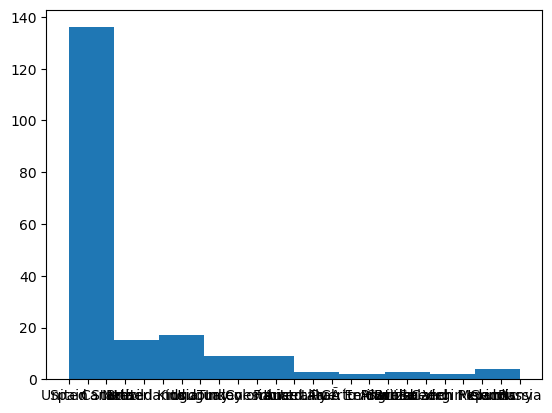

In [15]:
plt.hist(df['Country Or Region'])

In [16]:
# 4. Top 10 influencers list in the Dataset
#4.1. Based on followers
df[['Channel Info', 'Followers']].sort_values('Followers', ascending=False).nlargest(10, 'Followers')


,Channel Info,Followers
0,cristiano,485200000.0
1,kyliejenner,370700000.0
2,leomessi,363900000.0
3,selenagomez,348800000.0
4,therock,339400000.0
5,arianagrande,333000000.0
6,kimkardashian,330700000.0
7,beyonce,276100000.0
8,khloekardashian,273900000.0
9,justinbieber,260000000.0


In [17]:
# 4.2. Based on Average Likes
df[['Channel Info', 'Avg. Likes']].sort_values('Avg. Likes', ascending=False).nlargest(10, 'Avg. Likes')

,Channel Info,Avg. Likes
96,thv,15400000.0
131,j.m,14400000.0
165,rkive,10600000.0
0,cristiano,8700000.0
32,billieeilish,8400000.0
1,kyliejenner,8200000.0
2,leomessi,6700000.0
3,selenagomez,6100000.0
38,lalalalisa_m,6000000.0
22,zendaya,5900000.0


In [18]:
#4.3. Based on Total Likes
df[['Channel Info', 'Total Likes']].sort_values('Total Likes', ascending=False).nlargest(10, 'Total Likes')


,Channel Info,Total Likes
1,kyliejenner,5.740000e+10
0,cristiano,2.910000e+10
22,zendaya,2.080000e+10
6,kimkardashian,1.980000e+10
5,arianagrande,1.850000e+10
25,badgalriri,1.800000e+10
19,neymarjr,1.440000e+10
9,justinbieber,1.400000e+10
16,nickiminaj,1.290000e+10
4,therock,1.260000e+10


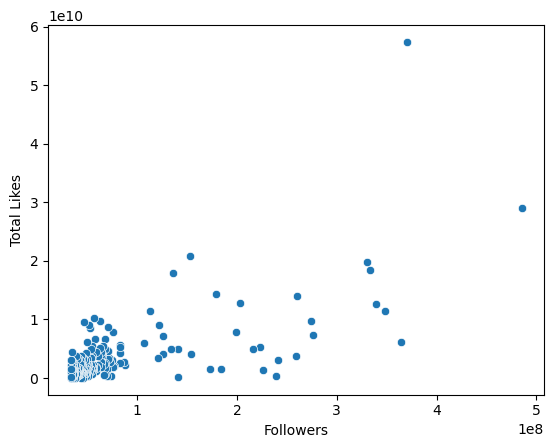

In [19]:
#5. relationship between the following pairs of features using a suitable graph
# 5.1.Relationship between followers and total Likes. 
import seaborn as sns
sns.scatterplot(x='Followers',y='Total Likes',data=df);

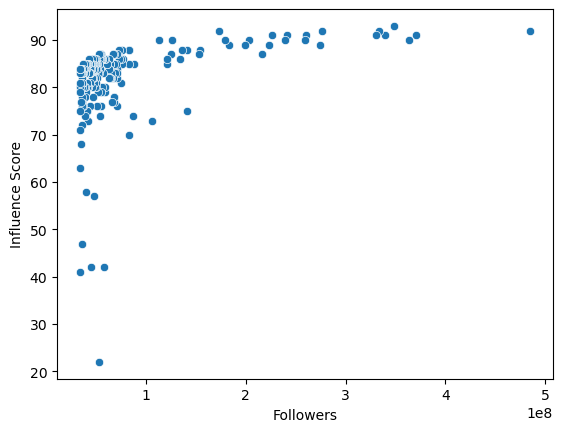

In [20]:
#5.2. Relationship between followers and Influence score
sns.scatterplot(x='Followers',y='Influence Score',data=df);

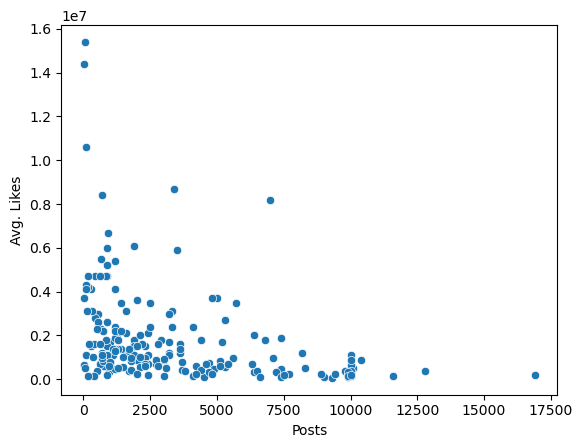

In [21]:
# 5.3. Relationship between Posts and Average Likes
sns.scatterplot(x='Posts',y='Avg. Likes',data=df);

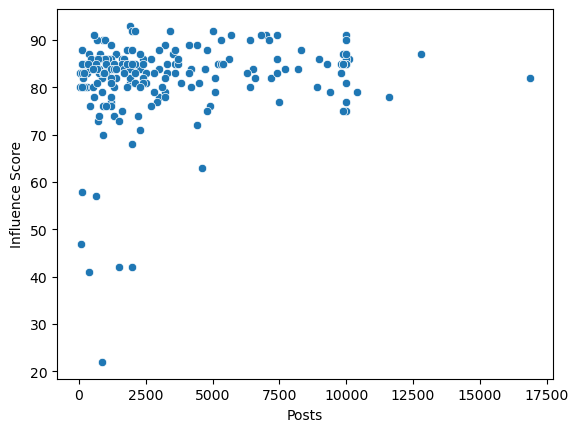

In [22]:
# 5.4. Relationship between Posts and Influence Score
sns.scatterplot(x='Posts',y='Influence Score',data=df);